In [33]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as cm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
import seaborn as sns
sns.set()
import time
from IPython.display import HTML
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
import torch

import warnings
warnings.filterwarnings('ignore')

In [9]:
data, labels = make_blobs(n_samples= 1000, centers=4, n_features= 2, random_state= 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


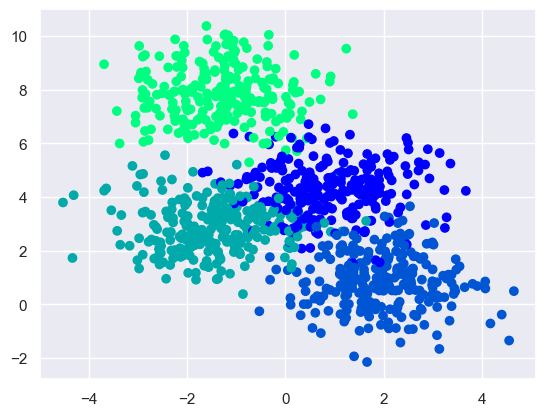

In [30]:
plt.scatter(data[:, 0], data[:, 1], c= labels, cmap= 'winter')
plt.show()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, stratify= labels, random_state= 0)

In [69]:
X_train, X_test, y_train, y_test = map(torch.tensor, (X_train, X_test, y_train, y_test))
y_train = y_train.long()
y_test = y_test.long()
X_train = X_train.to(torch.float32)
X_test = X_test.to(torch.float32)

In [70]:
import torch.nn.functional as F
from torch import optim
import torch.nn as nn

In [71]:
class FisrtNetwork(nn.Module):

    def __init__(self) -> None:
        super().__init__()
        torch.manual_seed(0)
        self.net = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 4),
            nn.Softmax()
        )

    def forward(self, X):
        return self.net(X)

In [72]:
X_train.dtype, y_train.dtype

(torch.float32, torch.int64)

In [73]:
def fit(x, y, model, opt, loss_fn, epochs = 1000):

    for epoch in range(epochs):
        loss = loss_fn(model(x), y)

        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item()

In [74]:
fn = FisrtNetwork()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr= 0.2)
fit(X_train, y_train, fn, opt, loss_fn)

1.1441876888275146